In [1]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

%matplotlib inline

h = .02  # step size in the mesh

In [2]:
names = ["Nearest Neighbors","Decision Tree", "Random Forest"]

In [3]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ]

In [4]:
def folder_finder(path):

    file_list = []

    for j in glob(path+"*.csv"):
        file_list.append(j)

    return file_list

def read_file(path):

    data = pd.read_csv(path, na_values = 'NaN', keep_default_na = False) 
    return data

def pd_to_np(data):
    
    if type(data) == np.ndarray:
      print('Data is already in numpy format!')
    else:
      data = data.values
      #print('Pandas to Numpy done!')

    return data


def string_to_index(activity_label):

    activity_class =[]
    har_class = {
                    'Cook':0,
                    'Eat':1,
                    'Phone':2,
                    'Read':3,
                    'Watch_TV':4
                }
    for label in activity_label:
        activity_class.append(har_class[label[0]])

    return activity_class


def data_loader(path, split=0.3):
    x = y = []
    feature_list = []
    
    pd_data = read_file(path)

    for i in pd_data:
        feature_list.append(i)

    selectData = pd_data.loc[:, feature_list[:-1]]
    activityLabel = pd_data.loc[:, ['activity']]
    x = pd_to_np(selectData)
    x = StandardScaler().fit_transform(x)
    y = string_to_index(activityLabel.values)
    y = np.asarray(y) 
    y = y.astype('int32')
    return x,y

def full_dataset(file_list):

    x=y = np.asarray([])
    x_temp =  y_temp =  []

    for i in range(len(file_list)):
        x_temp, y_temp = data_loader(file_list[i])

        if i == 0:
            x = x_temp
            y = y_temp
        else:
            x = np.concatenate([x, x_temp],axis=0)
            y  = np.concatenate([y ,y_temp],axis=0)
    return x,y

In [5]:
file_list = folder_finder("../Dataset/")
print(file_list)
print('Total files:',len(file_list))

['../Dataset\\new_dataset.csv']
Total files: 1


In [6]:
X,y= full_dataset(file_list)
print(X.shape)
print(y.shape)

(447530, 36)
(447530,)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_values = pca.fit_transform(X)

In [8]:
pcaDf = pd.DataFrame(data = pc_values, columns = ['pc 1', 'pc 2'])
pcaDf['Target'] = y
pcaDf.head()

# sns.FacetGrid(pcaDf,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()
# plt.show()

,pc 1,pc 2,Target
0,2.344420,-1.592285,2
1,1.749039,-1.399049,2
2,2.320278,-1.570984,2
3,1.722581,-1.313205,2
4,1.702177,-1.250782,2


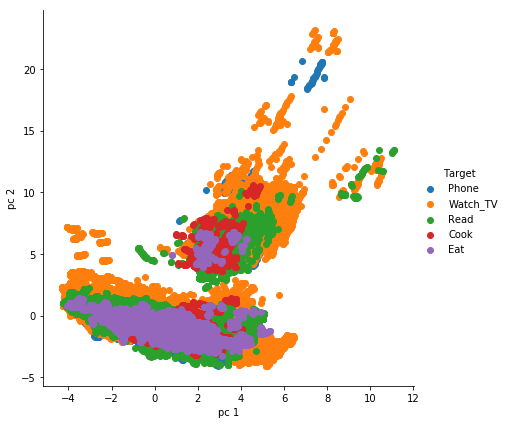

In [9]:
dmap = {
            0:'Cook',
            1:'Eat',
            2:'Phone',
            3:'Read',
            4:'Watch_TV'
        }

pcaDf['Target'] = pcaDf["Target"].map(dmap)
#pcaDf.head()
sns.FacetGrid(pcaDf,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()
plt.show()

<Figure size 1944x648 with 0 Axes>

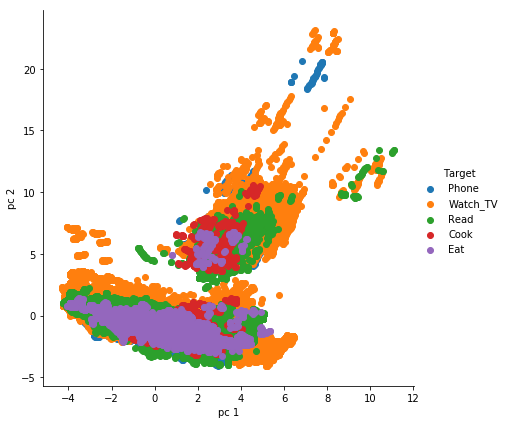

In [10]:
figure = plt.figure(figsize=(27, 9))
dmap = {
            0:'Cook',
            1:'Eat',
            2:'Phone',
            3:'Read',
            4:'Watch_TV'
        }

for i in range(len(file_list)):
    X,y = data_loader(file_list[i])
    
    pca = PCA(n_components=2)
    pc_train = pca.fit_transform(X)
    pcaDf = pd.DataFrame(data = pc_train, columns = ['pc 1', 'pc 2'])
    pcaDf['Target'] = y
    pcaDf['Target'] = pcaDf["Target"].map(dmap)
    sns.FacetGrid(pcaDf,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2').add_legend()

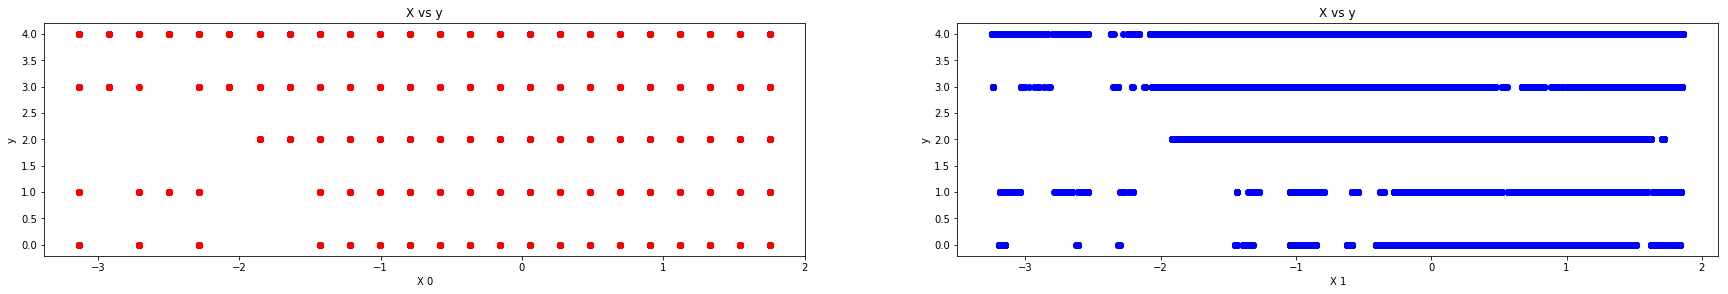

In [11]:
figure = plt.figure(figsize=(30, 30))

count = 1

for i in range(len(file_list)):
    X,y = data_loader(file_list[i])
    pca = PCA(n_components=2)
    pc_train = pca.fit_transform(X)
    pcaDf = pd.DataFrame(data = pc_train, columns = ['pc 1', 'pc 2'])
    pcaDf['Target'] = y
    
    ax = plt.subplot(6, 2, count)
    ax.scatter(X[:,0], y, color='r')
    ax.set_xlabel('X 0')
    ax.set_ylabel('y')
    ax.set_title('X vs y')
    
    ax = plt.subplot(6, 2, count+1)
    ax.scatter(X[:,1], y, color='b')
    ax.set_xlabel('X 1')
    ax.set_ylabel('y')
    ax.set_title('X vs y')
    count+=2
    plt.savefig('{:03d}.png'.format(len(file_list)))

# Classifier

In [12]:
print(X.shape)
print(y.shape)

(447530, 36)
(447530,)


In [13]:
X = pc_values

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable]

(799, 395)
(799, 395)
(799, 395)


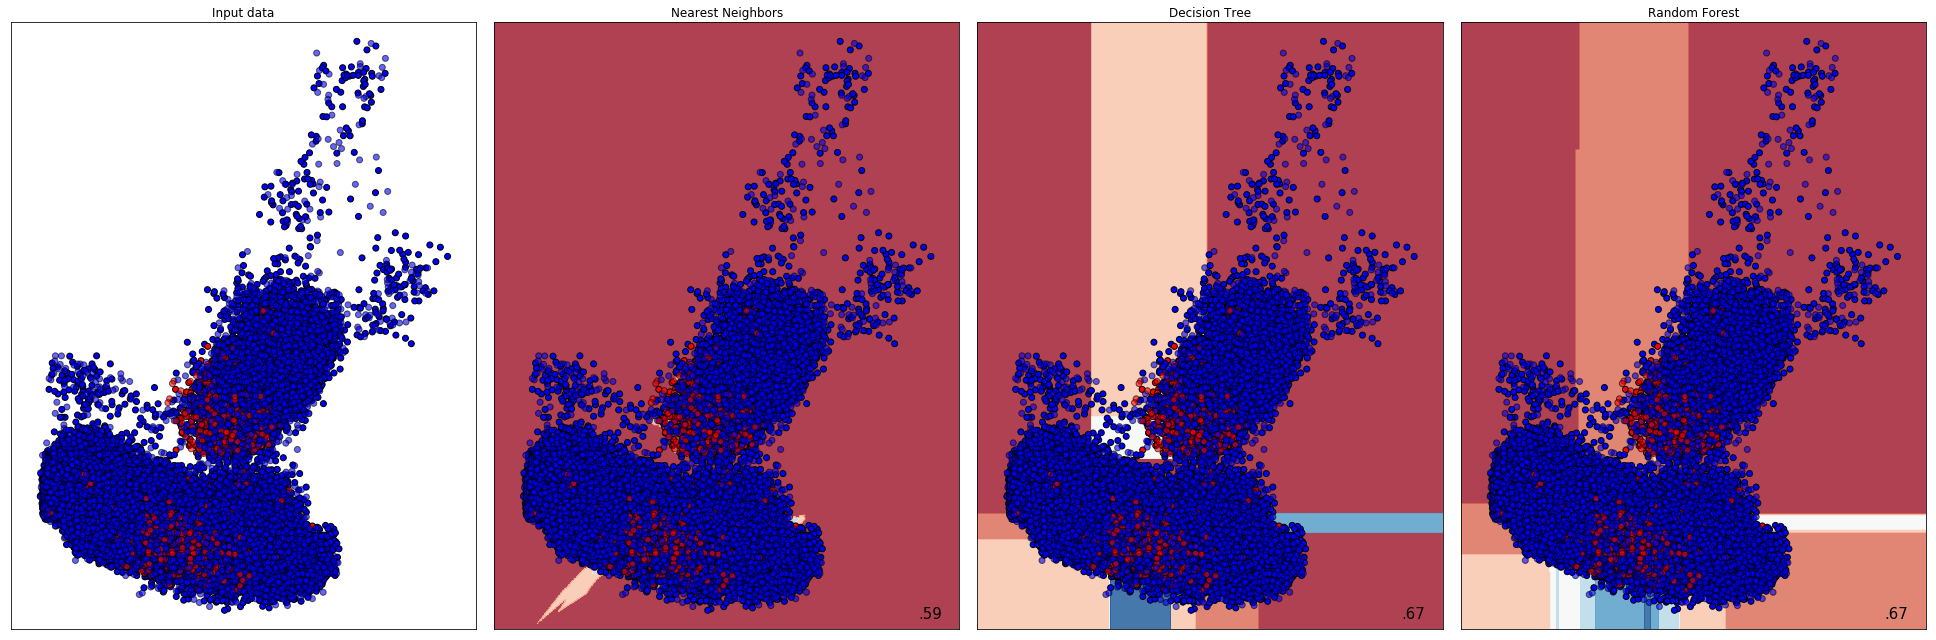

In [14]:
figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
         clf.fit(X_train, y_train)
         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
         if hasattr(clf, "decision_function"):
             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
         else:
             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
         Z = Z.reshape(xx.shape)
         #Z = Z.flatten().reshape(1960,420)
         ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
         print(Z.shape)

#         # Plot the training points
         ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
#         # Plot the testing points
         ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

         ax.set_xlim(xx.min(), xx.max())
         ax.set_ylim(yy.min(), yy.max())
         ax.set_xticks(())
         ax.set_yticks(())
         if ds_cnt == 0:
             ax.set_title(name)
         ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                 size=15, horizontalalignment='right')
         i += 1

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

def train_model(model, X_train, y_train):
    return model.fit(X_train, y_train)

def test_model(model,X_test):
    pred = model.predict(X_test)
    return pred
    
def model_init():

    model = classifiers[0]
    # model = DecisionTreeClassifier()
    return model
    
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
# For model evolution
def model_evalution(y_test, y_pred):
    #confusion_matrix(y_test, y_pred)
    print("------------------- Model evaluation ----------------\n\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("--------------------------------------------")
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report : \n",classification_report(y_test, y_pred))
    print("--------------------------------------------")
    print("")

    heatmap_cm(pd.DataFrame(confusion_matrix(y_test,y_pred)))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

X_train.shape

(268518, 2)

In [17]:
model = model_init()
net = train_model(model,X_train,y_train)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[ 8728   554  1386  1042  9625]
 [ 1048   140   314   228  1991]
 [ 3177   367  1311   586  6676]
 [ 4109   476  1236  1758 13787]
 [14793  1701  4826  4963 94190]]
--------------------------------------------
Accuracy Score :  0.592848524121288
Classification Report : 
               precision    recall  f1-score   support

           0       0.27      0.41      0.33     21335
           1       0.04      0.04      0.04      3721
           2       0.14      0.11      0.12     12117
           3       0.20      0.08      0.12     21366
           4       0.75      0.78      0.76    120473

    accuracy                           0.59    179012
   macro avg       0.28      0.28      0.27    179012
weighted avg       0.57      0.59      0.58    179012

--------------------------------------------



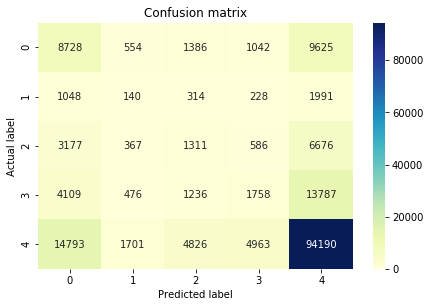

In [18]:
y_pred = test_model(net,X_test)
model_evalution(y_test, y_pred)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

def train_model(model, X_train, y_train):
    return model.fit(X_train, y_train)

def test_model(model,X_test):
    pred = model.predict(X_test)
    return pred
    
def model_init():

    model = classifiers[1]
    # model = DecisionTreeClassifier()
    return model
    
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
# For model evolution
def model_evalution(y_test, y_pred):
    #confusion_matrix(y_test, y_pred)
    print("------------------- Model evaluation ----------------\n\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("--------------------------------------------")
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report : \n",classification_report(y_test, y_pred))
    print("--------------------------------------------")
    print("")

    heatmap_cm(pd.DataFrame(confusion_matrix(y_test,y_pred)))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

X_train.shape

(268518, 2)

In [21]:
model = model_init()
net = train_model(model,X_train,y_train)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[     0      0     68     69  21198]
 [     0      0     90     21   3610]
 [     0      0    315      3  11799]
 [     0      0    175    160  21031]
 [     0      0    215     79 120179]]
--------------------------------------------
Accuracy Score :  0.6739995084128438


E:\CSE99\envs\CSE499\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\CSE99\envs\CSE499\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\CSE99\envs\CSE499\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     21335
           1       0.00      0.00      0.00      3721
           2       0.37      0.03      0.05     12117
           3       0.48      0.01      0.01     21366
           4       0.68      1.00      0.81    120473

    accuracy                           0.67    179012
   macro avg       0.30      0.21      0.17    179012
weighted avg       0.54      0.67      0.55    179012

--------------------------------------------



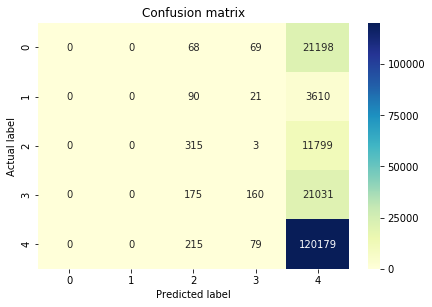

In [22]:
y_pred = test_model(net,X_test)
model_evalution(y_test, y_pred)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

def train_model(model, X_train, y_train):
    return model.fit(X_train, y_train)

def test_model(model,X_test):
    pred = model.predict(X_test)
    return pred
    
def model_init():

    model = classifiers[2]
    # model = DecisionTreeClassifier()
    return model
    
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
# For model evolution
def model_evalution(y_test, y_pred):
    #confusion_matrix(y_test, y_pred)
    print("------------------- Model evaluation ----------------\n\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("--------------------------------------------")
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report : \n",classification_report(y_test, y_pred))
    print("--------------------------------------------")
    print("")

    heatmap_cm(pd.DataFrame(confusion_matrix(y_test,y_pred)))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

X_train.shape

(268518, 2)

In [25]:
model = model_init()
net = train_model(model,X_train,y_train)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[     0      0      0      0  21335]
 [     0      0      0      0   3721]
 [     0      0      0      0  12117]
 [     0      0      0      0  21366]
 [     0      0      0      0 120473]]
--------------------------------------------
Accuracy Score :  0.6729884030120886


E:\CSE99\envs\CSE499\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\CSE99\envs\CSE499\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\CSE99\envs\CSE499\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     21335
           1       0.00      0.00      0.00      3721
           2       0.00      0.00      0.00     12117
           3       0.00      0.00      0.00     21366
           4       0.67      1.00      0.80    120473

    accuracy                           0.67    179012
   macro avg       0.13      0.20      0.16    179012
weighted avg       0.45      0.67      0.54    179012

--------------------------------------------



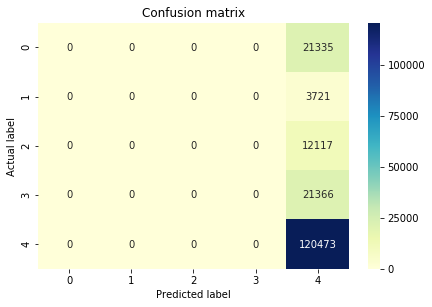

In [26]:
y_pred = test_model(net,X_test)
model_evalution(y_test, y_pred)